In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "data"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [3]:
train_generator = train_datagen.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode='binary',subset='training')

Found 3600 images belonging to 3 classes.


In [4]:
validation_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation' 
)

Found 900 images belonging to 3 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D(2,2), 
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation="sigmoid")
])


c:\Users\hisha\Desktop\New\wall\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

c:\Users\hisha\Desktop\New\wall\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5547 - loss: 0.2788 - val_accuracy: 0.5536 - val_loss: 0.1369
Epoch 2/10
  1/112 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.6562 - loss: -0.0727

c:\Users\hisha\Desktop\New\wall\myenv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.6562 - loss: -0.0727 - val_accuracy: 0.5547 - val_loss: 0.1383
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5493 - loss: 0.1014 - val_accuracy: 0.5547 - val_loss: 0.1563
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.6562 - loss: -0.3430 - val_accuracy: 0.5569 - val_loss: 0.2112
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5510 - loss: 0.6665 - val_accuracy: 0.5569 - val_loss: 2.0733
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.7812 - loss: 4.9215 - val_accuracy: 0.5569 - val_loss: 1.9212
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 102s 911ms/step - accuracy: 0.5533 - loss: -25.5318 - val_accuracy: 0.5547 - val_loss: -523.4958
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.6562 - loss: -855.7383 - val_accuracy: 0.5569 - val_loss: -1436.2861
Epoch 9/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 98s 870ms/step - accuracy: 0.5510 - loss: 336.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


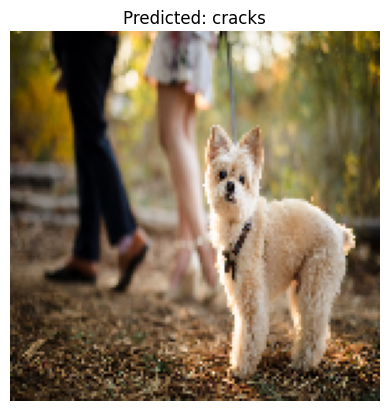

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'dog.jpg'  
img = image.load_img(img_path, target_size=(150, 150))  

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  

prediction = model.predict(img_array)

class_labels = ['cracks','non cracks']
 
predicted_class = class_labels[np.argmax(prediction)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
